In [3]:
import pandas as pd
import matplotlib.pyplot as plt # importando módulo pyplot - criam e alteram figuras por programação
import seaborn as sns
%matplotlib inline # Comando mágico("%") - configura o notebook para exibir as imagens geradas pela matplotlib e seus derivados no próprio jupyter  

**Informações sobre a biblioteca matplotlib**

- [Documentacao](https://matplotlib.org/stable/users/index.html)
- [Modificando_cores](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)

**Informação para a biblioteca seaborn**
- [documentacao](https://seaborn.pydata.org/index.html)
- [paleta de core](https://seaborn.pydata.org/tutorial/color_palettes.html)

### Gerando gráfico de barras

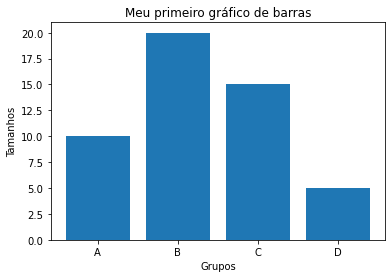

In [6]:
categorias = ['A', 'B', 'C', 'D'] # Gerando lista com categorias
valores = [10, 20, 15, 5] # Gerando lista com valores
plt.bar(categorias, valores) # imprimindo gráfico de barras com os dados definidos anteriormente
plt.xlabel('Grupos') # Definindo título do eixo das absissas
plt.ylabel('Tamanhos') # Definindo nome do eixo das ordenadas
plt.title('Meu primeiro gráfico de barras') # Definindo título do gráfico
plt.show() # Usada para exibir a visualização gerada

**Alterando as informações de tamanho da imagem e cor das barras**

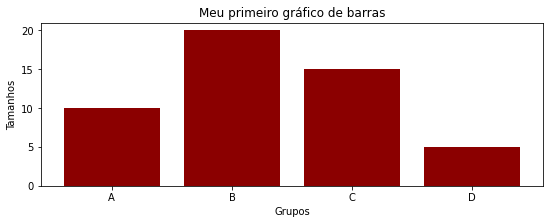

In [9]:
plt.figure(figsize=(9, 3)) # Alterando comprimento (largura X altura) unidade de medida em polegadas
categorias = ['A', 'B', 'C', 'D'] # Gerando lista com categorias
valores = [10, 20, 15, 5] # Gerando lista com valores
plt.bar(categorias,  valores, color='darkred' ) # imprimindo gráfico de barras com os dados definidos anteriormente
plt.xlabel('Grupos') # Definindo título do eixo das absissas
plt.ylabel('Tamanhos') # Definindo nome do eixo das ordenadas
plt.title('Meu primeiro gráfico de barras') # Definindo título do gráfico
plt.show() # Usada para exibir a visualização gerada

### Importando arquivo json

**O que é um arquivo json**
- Json - Javascript object notation
    - É um tipo de formato usado para arquivos com formato para troca de dados compacto, de padrão aberto. Como tem uma estrutura pré-definida, é fácil converter os dados armazenados nele em tabela


In [12]:
# recebendo arquivos json
# Primeiro armazenamos o link para o arquivo
filmes_uri = 'https://raw.githubusercontent.com/emanueles/datavis-course/master/assets/files/observable/movies.json'

# usamos a função para capturar os dados em uma estrutura de dataframe
df_filmes = pd.read_json(filmes_uri) 

# exibimos as 5 primeiras linhas
df_filmes.head()

,Film,Year,Genre,Worldwide_Gross_M,Budget_M
0,Harry Potter and the Deathly Hallows Part 2,2011,Fantasy,1328,125
1,Mission Impossible 4,2011,Action,689,145
2,Toy Story 3,2010,Animation,1063,200
3,2012,2009,Action,768,200
4,Alice in Wonderland,2010,Adventure,1024,200


### Vamos fazer uma análise sobre o data frame de forma mais objetiva

In [17]:
# Buscando informações gerais sobre os dados no data frame
df_filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Film               30 non-null     object
 1   Year               30 non-null     int64 
 2   Genre              30 non-null     object
 3   Worldwide_Gross_M  30 non-null     int64 
 4   Budget_M           30 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.3+ KB


**Aqui analisamos que há 5 tipos de variáveis: 2 quantitativas ( *Budget_M* e *Worldwide_Gross_M*) e 3 categóricas (*Film*, *Year* e *Gender*)**

obs: *Film*, apesar de seus dados serem numéricos, int64, como indica a função `info`, a variável é categórica, pois indica o ano em que o filme foi lançado

---
É possível observar outras informações como:
- Quantidade de linhas: 30, vai da linha 0 à 29
- Tipos dos dados das features: 3 tipos int64 e 2 do tipo object
- Memória usada para armazenar os dados 1.3+ KB
- Nome das features
- Se há dados não nulos (nesse caso não há)
- Nome da classe que chamou pelo `info`

### Vamos para a análise descritiva dos dados das features

In [20]:
# Mostrando medidas estatísticas para os atributos quantitativos das colunas numéricas
df_filmes.describe()

,Year,Worldwide_Gross_M,Budget_M
count,30.000000,30.000000,30.000000
mean,2009.100000,889.133333,168.933333
std,1.422722,397.207818,54.591861
min,2007.000000,621.000000,50.000000
25%,2008.000000,696.000000,146.250000
50%,2009.000000,793.000000,162.500000
75%,2010.000000,951.250000,200.000000
max,2011.000000,2784.000000,300.000000


**Quantos filmes existem de cada gênero ?**

Para responder essa pergunta precisamos agrupar o filme por gênero. Nesse caso usamos o método `.groupby` seguindo de um `by="Genre"`, dessa forma irá criar um outro data frame com a classe **Genre** sendo o índice, e depois inserimos `.count()`, assim ele irá agrupar por gênero e irá retornar a contagem dos filmes para cada gênero.

**groupby** permite agrupar os dados em função de um atributo e efetuar operações matemáticas nele

In [45]:
df_filmes.groupby(by='Genre').count()

,Film,Year,Worldwide_Gross_M,Budget_M
Genre,,,,
Action,13,13,13,13
Adventure,4,4,4,4
Animation,8,8,8,8
Drama,2,2,2,2
Fantasy,1,1,1,1
Romance,1,1,1,1
Thriller,1,1,1,1


---

Podemos gerar uma visualização com matplotlib através dos dados agrupados

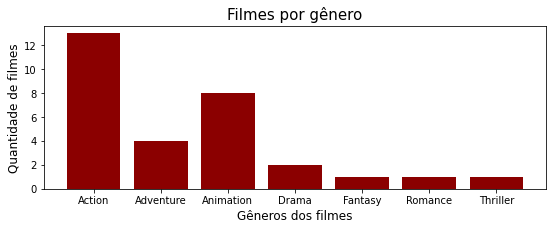

In [56]:
filmes_por_genero = df_filmes.groupby(by='Genre').count() # Armazenamos o dataframe com a contagem dos gêneros

plt.figure(figsize=(9,3)) # Definimos o tamanho da figura

# Em plt.bar, definimos o eixo x como índices do dataframe, ou seja, os gêneros dos filmes. Perceba que ".index" retorna o índice
# definimos como y, os dados observáveis, os dados das quantidade de filmes por gênero armazenado na coluna "Film"
# Em color, defimos a cor da barra
plt.bar(filmes_por_genero.index, filmes_por_genero['Film'], color='darkred')

plt.xlabel('Gêneros dos filmes', color='black', size=12) # Definindo nomenclatura do eixo x

plt.ylabel('Quantidade de filmes', color='black', size=12) # Definindo nomenclatura do eixo y

plt.title('Filmes por gênero', color='black', size=15) # Definindo título do gráfico

plt.show() # Mostrando figura

**Gráficos de Barras com seaborn**

**Diferença entre seaborn e matplotlib**
- Enquanto a matplotlibe é orientada a sequência de dados, a seaborna é orientada a conjunto de dados com múltiplas variáveis. Sendo desenvolvida especificamente para gerar gráficos através de grandes conjuntos de dados, o que a faz se integrar perfeitamente com os dataframes do pandas e além de possui suporte para variáveis categóricas
- Problemas que temos com matplotlib, como números e nomenclaturas de categorias muito próximas não surgem aqui
- A visualização com seaborn é construida mais facilmente, uma vez que não precisamos agrupar os dados usando o matplot, o próprio seaborn se encarrega disso
- Gráficos são mais bonitos e simples de se modificar

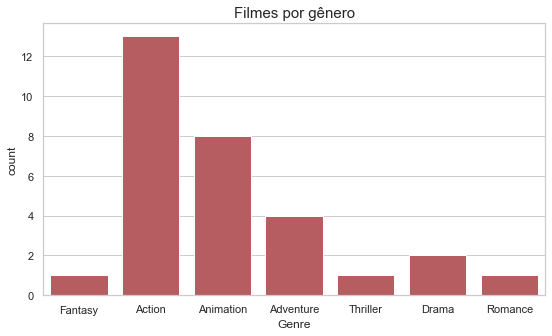

In [74]:
plt.figure(figsize=(9, 5)) # Definindo o tamanho da figura

# chamamos set para definir algo na biblioteca para todas as visualizações nesse notebook. Se torna um padrão
# set recebe style, o que significa que é desejado definir o estilo dos gráficos
# style recebe whitegrid, definindo o fundo do gráfico como branco com grades 
# Poderiamos usar também: darkgrid, dark, white, ticks
sns.set(style='whitegrid')  

# Chamamos countplot. Ele gera um gráfico após contar os elementos para o grupo definido como argumento
# Primeiro definimos os dados que serão utilizados para efetuar a contagem
# Depois definimos qual dado será contado e em qual eixo ele vai ficar. No caso, difinimos 'Genre' no eixo x. Podia ser no eixo y
# Após essa definição, ele vai contar os gêneros e definir no outro eixo o valor numérico
# No eixo definido no argumento, ele irá colocar as categorias
# Por último, definimos uma cor para as barras: vermelho
sns.countplot(data=df_filmes, x='Genre', color='r' )

# Definimos o nome do gráfico.
# Poderiamos definir o nome dos eixos também, mas o seaborn já faz isso automaticamente
plt.title('Filmes por gênero', size=15)

# plt.show() para exibir a visualização criada
plt.show()

**Percebe que o gráfico gerado por `countplot` é um gráfico de barras, logo é plausível concluir que o valor que ele deve receber deva ser um valor categórico**

**Observe também que com seaborn passamos o data frame inteiro, ou seja, um conjunto de dados. Já no matplotlib, passamos uma sequência de dados**

**Para evitar que as categorias se sobrepossem, aumentamos o tamanho da figura**

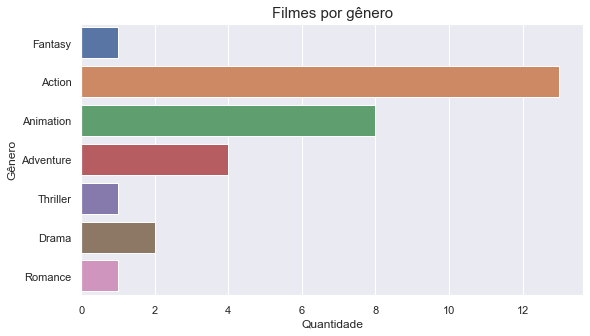

In [77]:
plt.figure(figsize=(9, 5)) # Definindo o tamanho da figura

sns.set(style='darkgrid')  

sns.countplot(data=df_filmes, y='Genre' )

plt.ylabel('Gênero')
plt.xlabel('Quantidade')
plt.title('Filmes por gênero', size=15)

# plt.show() para exibir a visualização criada
plt.show()

Observe que há mais filmes de ação produzido do que qualquer outro filme. 

O filme de menor produção são do gênero Thriller, Romance e Fantasia

### Usando barplot no seaborn

**Diferente do countplot, que apenas conta os dados e mostra a contagem para cada categoria, com o barplot podemos tirar medidas estatísticas para as categorias. No exemplo a baixo apresentamos a média de bilheteria por categoria**

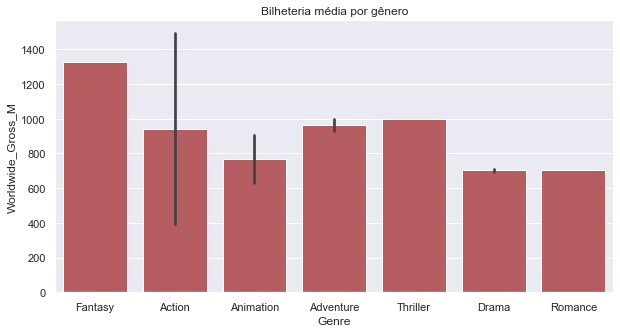

In [83]:
plt.figure(figsize=(10, 5)) # Definimos o tamanho

plt.title('Bilheteria média por gênero') # Definimos o título

# Chamamos a função para criar o gráfico de barras
# Definimos o dado que vai ser usado como categoria em x
# Definimos o valor que vai ser colocado em y. Desse dado, será calculado a média para as categorias definidas em x
# Definmos a cor como b de blue para as barras
# Definimos o ci (confidence interval) para estimar intervalos de confiança, um intervalo on
# ci recebee sd (standard deviation ou desvio padrão), ao invés de receber o intervalo, ele recebe e exibe o desvio padrão
# Definimos o dataset que irá fornecer os dados
sns.barplot(x='Genre', y='Worldwide_Gross_M', color='r', ci = 'sd', data = df_filmes)

plt.show() # Exibindo a visualização

**Análise**

Observe que em média, o valor de bilheteria para filmes de fantasia é maior que o valor de bilheteria para outros filmes.Algumas hipóteses para isso são:filmes de fantasia levam mais pessoas para o cinema; Filmes de fantasia tem ingresso mais caro 

Percebemos também que não há um desvio padrão para os dados em filmes de fantasia. Ou seja, a receita para esses filmes tem uma variação pequena. Há hipótese para isso: Filmes de fantasia tem um grupo de pessoas fixas, um nicho mais fechado, onde há pouca rotação de pessoas por esse nixo e por isso, normalmente, a quantidade de pessoas que vão ver esses filmes são mais fixas, próximas uma da outra

Por outro lado, o gênero de ação, que tem mais filmes, não se aproxima do valor de bilheteria gerado para filmes de fantasia em média.

O maior desvio padrão dos gêneros de ação é maior, indicando que os valores de receita variam bastante entre os filmes

---

**Vamos analisar agora o somatório dos valores e não mais a média** 

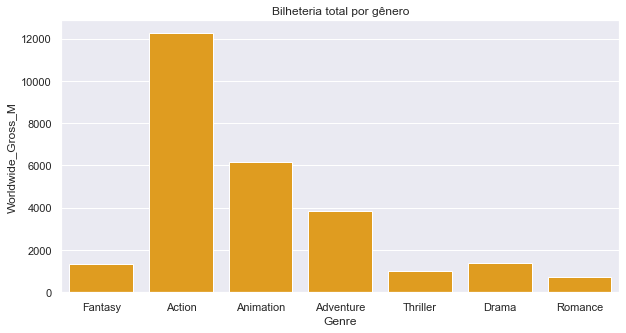

In [86]:
plt.figure(figsize=(10, 5))
plt.title('Bilheteria total por gênero')

# Agora usamos o atributo estimator, que define a operação que vai ser executada sobre os dados
# estimator recebe sum, ou seja, irá ocorrer o somatório das bilheterias por gênero
# Dessa vez não definimos o desvio padrão em ci
sns.barplot(x='Genre', y= 'Worldwide_Gross_M', color='orange', estimator = sum, ci= None, data=df_filmes)
plt.show()

**Análise**

Observamos aqui que os filmes de ação tem um somatória de bilheteria maior, isso se dá porque foi produzido mais filmes de ação do que qualquer outro filmes ao longo do intervalo de anos em que foi recolhido os dados

Os filmes de fantasia, que lideram a média das bilheterias, não chega perto do somatório total das bilheterias de filmes de ação. Isso ocorre porque há muito menos filmes de ação produzido durante aquele período

### Gráficos de barras agrupados com seaborn

**Podemos querer avaliar mais de uma categoria nos nossos dados. Assim, o agrupamento pode representar outra categoria**

**Podemos atribuir a nova variável para o atributo `hue` que significa "matiz de cor", ou seja, a nova categoria vai ser definida pelas cores**

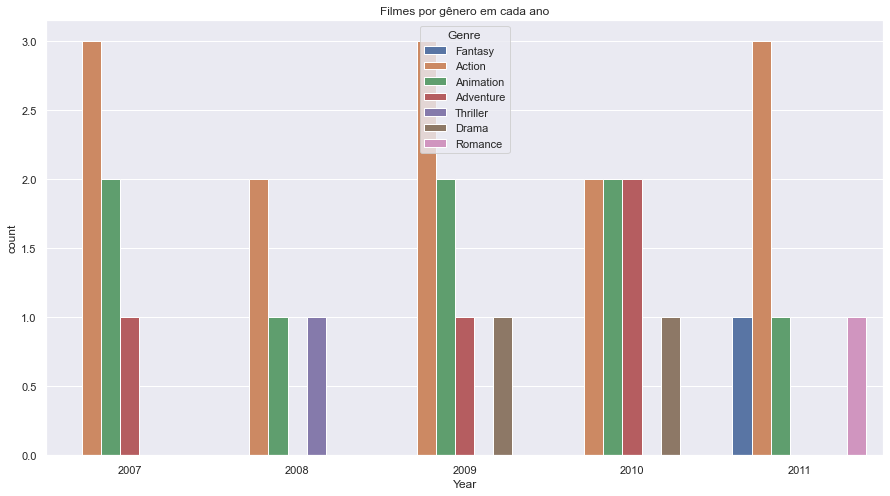

In [92]:
plt.figure(figsize=(15, 8))

# geramos um countplot para um gráfico de 2 variáveis categóricas. Nesse caso, ele vai contar 
# quantidade de filmes de cada gênero, separando por gênero para cada ano(agrupamento)
# x vai receber o nome dos dados que vão formar o agrupamento
# hue recebe 'Genre', ou seja, as cores em cada barra vão definir o agrupamento
sns.countplot(x='Year', hue = 'Genre', data = df_filmes)

plt.title('Filmes por gênero em cada ano')
plt.show()

**Observe as cores mapeiam os gêneros e a posição mapeia os anos**



**Análise**

Aqui observamos a quantidade de filmes lançados por gênero em cada ano em que foram coletados.

Notamos que nem todos os filmes estão o gráfico de barras agrupado. Isso acontece porque na amostra, os filmes de alguns gêneros são escassos, dessa forma, em alguns anos não há lançamentos de certos gêneros.

Notamos que todo ano há lançamento de filme de ação, com variação entre anos.

Só há um filme de fantasia e um filme de romance

---
**Analisando média de bilheteria de cada gênero por ano**

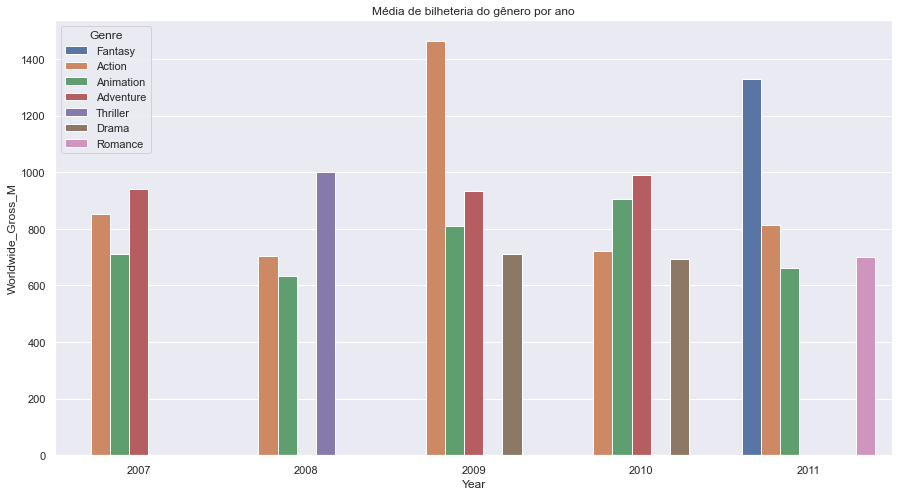

In [95]:
plt.figure(figsize=(15, 8))

sns.barplot(x = 'Year', y ='Worldwide_Gross_M', hue = 'Genre', ci = None, data = df_filmes)

plt.title('Média de bilheteria do gênero por ano')

plt.show()

**Análise**

Podemos observar que as maiores bilhetes por ano ficam em quantidade aos filmes de Aventura, que aparece duas vezes.

Filmes de ação são mais constantes nos anos, mas não tem tanto destaque, tendo ganhodo por quantidade de bilheteria apenas em 2009 como maior bilheteria em todos os 5 anos

O filmes de fantasia, tem uma bilheteria bastante alta com o único filme em 2011. Por conta dessa bilheteria, que foi alta, ele superou os filmes de ação em média de bilheteria

**Alterando paleta de cores em gráficos de barras duplas**

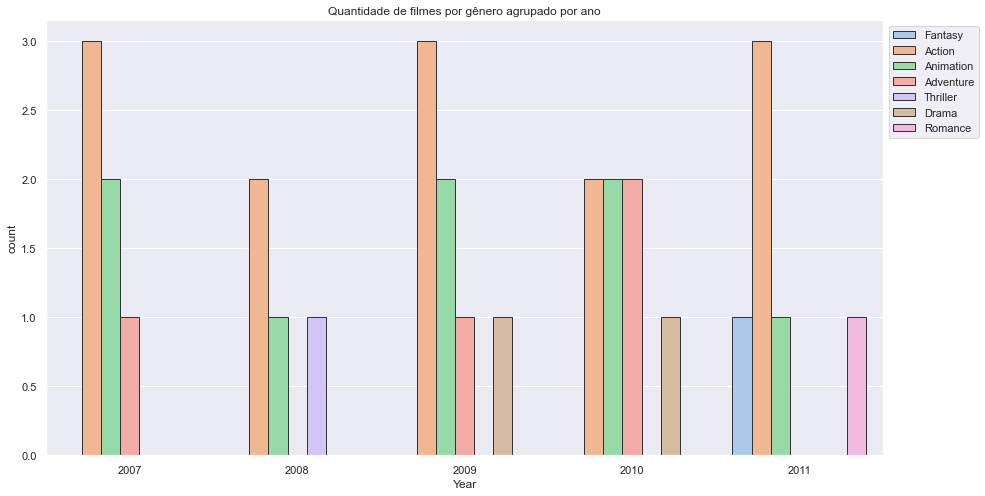

In [104]:
plt.figure(figsize=(15,8))
plt.title('Quantidade de filmes por gênero agrupado por ano')

# alteramos o valor do atributo "palette", que recebe a paleta de cores pastel
# alteramos o valor do atributo edgecolor, que é um atributo que configura a intensidade da cor da borda da barra
# quanto mais próxima de 0, mais preto; quanto mais próximo de 1, mais branco
sns.countplot(x="Year", hue= 'Genre', palette = "pastel", edgecolor="0.2", data=df_filmes)
plt.legend(bbox_to_anchor=(1,1), loc=2) # Ajustando a legenda para o lado de fora do gráfico
plt.show()

**Salvando gráficos**

- Podemos salvar a imagem apenas clicando sobre ela e escolhendo "salvar como"

- Podemos automatizar usando uma função da matplot:
    - `savefig()` 
        - Exibi o gráfico gerado e o salva na pasta atual do notebook
        - Recebe como argumento o nome do arquivo a ser salvo
        - Pode receber o caminho de outra pasta para salvar a imagem
        - Pode receber argumento para a extensão da imagem, resolução e outros
        

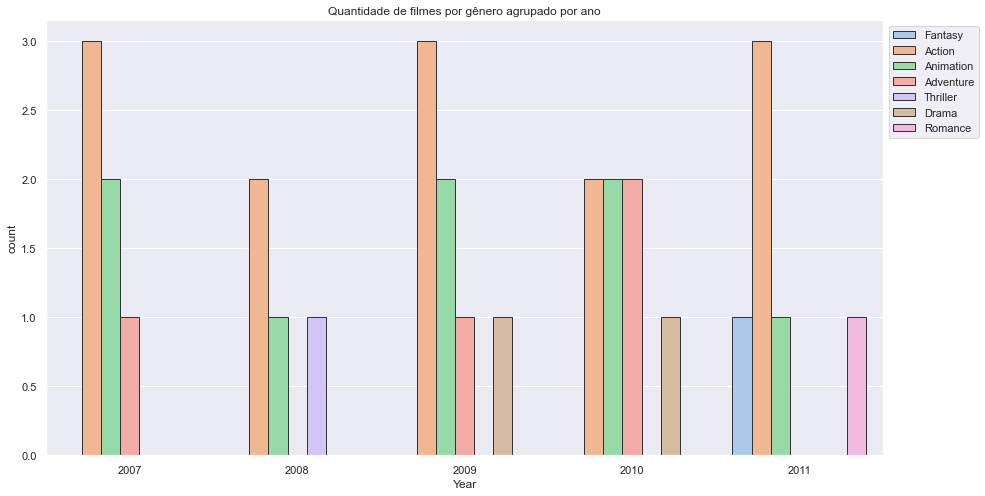

In [105]:
plt.figure(figsize=(15,8))
plt.title('Quantidade de filmes por gênero agrupado por ano')

# alteramos o valor do atributo "palette", que recebe a paleta de cores pastel
# alteramos o valor do atributo edgecolor, que é um atributo que configura a intensidade da cor da borda da barra
# quanto mais próxima de 0, mais preto; quanto mais próximo de 1, mais branco
sns.countplot(x="Year", hue= 'Genre', palette = "pastel", edgecolor="0.2", data=df_filmes)
plt.legend(bbox_to_anchor=(1,1), loc=2) # Ajustando a legenda para o lado de fora do gráfico
plt.savefig('QuantidadeDeFilmesPorGeneroAgrupadoPorAno')